In [7]:
%pylab inline
import numpy as np
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
from scipy.integrate import odeint, quad
plt.style.use('seaborn-whitegrid')

Populating the interactive namespace from numpy and matplotlib


### 1. We used three equations when deriving the Friedman equations: ###
(1) $$ \frac{\ddot a(t)}{a(t)} = \frac{-4\pi G}{3c^{2}}[\epsilon (t)+3P(t)]$$


(2) $$(\frac{\dot a(t)}{a(t)})^{2} = \frac{8\pi G\epsilon (t)}{3c^{2}}-\frac{kc^{2}}{a(t)^{2}} $$


(3) $$\dot \epsilon (t) + \frac{3\dot a(t)}{a(t)}(\epsilon + P) = 0   $$

### In fact only two of these are independent. Show how we get the 3rd of these equations from the first two. ###

#### Starting with Equation $\#$2:

$$(\frac{\dot a(t)}{a(t)})^{2} = \frac{8\pi G\epsilon (t)}{3c^{2}}-\frac{kc^{2}}{a(t)^{2}}$$

#### Multiplying the equation by $a^{2}$:

$$\dot{a}^{2} = \frac{8\pi{}G}{3c^{2}}\epsilon a^{2} - kc^{2}$$

#### Taking the time derivative, by term:

$$\frac{d}{dt}(\dot{a}^{2}) = 2\dot{a}\ddot{a} \quad \frac{d}{dt}(\epsilon{}a^{2}) = \dot{\epsilon}a^{2} + \epsilon(2a\dot{a}) \quad \frac{d}{dt}(kc^2) = 0$$

#### So the entire equation becomes:

$$2\dot{a}\ddot{a} = \frac{8\pi{}G}{3c^2}[\dot{\epsilon}a^{2} + 2\epsilon{}a\dot{a}]$$

#### Dividing by a:

$$2\dot{a}(\frac{\ddot{a}}{a}) = \frac{8\pi{}G}{3c^2}[\dot{\epsilon}a + 2\epsilon{}\dot{a}]$$

#### From Equation $\#$1 we have an expression for $\frac{\ddot{a}}{a}$ we can substitute in:

$$2\dot{a}(\frac{-4\pi{}G}{3c^{2}}[\epsilon+3P]) =  \frac{8\pi{}G}{3c^2}[\dot{\epsilon}a + 2\epsilon{}\dot{a}]$$

#### Expanding: 

$$\dot{a}\frac{-8\pi{}G}{3c^{2}}[\epsilon+3P] =  \frac{8\pi{}G}{3c^2}[\dot{\epsilon}a + 2\epsilon{}\dot{a}]$$

#### Dividing out the constants:

$$-\dot{a}[\epsilon+3P] =  [\dot{\epsilon}a + 2\epsilon{}\dot{a}]$$

#### Dividing by $\dot{a}$:

$$-[\epsilon+3P] =  [\dot{\epsilon}\frac{a}{\dot{a}} + 2\epsilon{}]$$

#### Moving the terms to one side:

$$\dot{\epsilon}\frac{a}{\dot{a}} + 2\epsilon{} + \epsilon + 3P = 0$$

#### Combining and rearranging we arrive at the fluid equation: 

$$\dot{\epsilon} + 3(\frac{\dot{a}}{a})(\epsilon + P) = 0$$

Where $a, \epsilon,$ and $P$ are all functions of time.

### 2. Using your understanding of how to integrate (from the second homework) write a program that integrates the Friedman equation, ###

$$(\frac{H(z)}{H_{0}})^{2} = (\Omega_{r,0}(1+z)^{4} + \Omega_m,0(1+z)^{3} + \Omega_{\Lambda,0}+(1-\Omega_{0})(1+z)^{2})  $$


### Using this program calculate and plot (a) the comoving distance from z=0 to 10 (b) the age of the universe (at a given redshift) from z=0 to z=10. Calculate these results for the two universes given below ###

### (a) a flat universe with $\Omega_{m,0} = 0.3$,  $\Omega_{r,0} = 0$, $\Omega_{\Lambda} = 0.7$.###
### (b) a closed universe with $\Omega_{m,0} = 10.0$, $\Omega_{r,0} = 0$, $\Omega_{\Lambda} = 0$. ###

### Note: to calculate the age of the universe remember that H(z) is directly related to $\frac{dz}{dt}$. Use $H_{0} = 70 km s^{-1}Mpc^{-1}$ in your calculations and plot the age in Gyr. ###

In [45]:
H_0 = 70;
c = 2.9979e5;
def H(z, r0, m0, L0):
    Omega_0 = r0 + m0 + L0;
    return H_0*np.sqrt(r0*(1+z)**4 + m0*(1+z)**3 + L0 + (1-Omega_0)*(1+z)**2)   

#### (a) Comoving distance

The comoving distance is related to $H(z)$ by $\int_{0}^{z}\frac{c}{H(z)}dz$.

In [53]:
z = 0;
flat = np.empty(101, dtype=object)
closed = np.empty(101, dtype=object);
iteration = 0;
H_flat = lambda z: c/H(z, 0, 0.3, 0.7);
H_closed = lambda z: c/H(z, 0, 10, 0);
while (z <= 10):
    flat[iteration] = quad(H_flat, 0, z)[0];
    closed[iteration] = quad(H_closed, 0, z)[0];
    z += 0.1;
    iteration += 1;

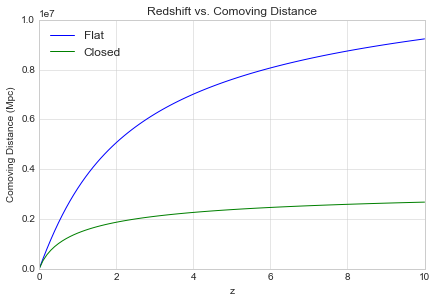

In [54]:
z_points = np.linspace(0, 10, 101)

fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Redshift vs. Comoving Distance")
ax.set_xlabel("z")
ax.set_ylabel("Comoving Distance (Mpc)")

ax.plot(z_points, flat, label="Flat")
ax.plot(z_points, closed, label="Closed")
ax.legend(loc=2)

#### (b) Age of the universe

In order to integrate, we need to find a relationship between time and H(z). We know that $a = \frac{1}{1 + z}$. Rearranging this, we see that $z = \frac{1}{a} - 1$. Taking the time derivative of this we get $\frac{dz}{dt} = \frac{-\dot{a}}{a}\frac{1}{a}$. Since $\frac{1}{a} = 1+z$, we can plug that in to get $\frac{dz}{dt} = \frac{-\dot{a}}{a}(1+z)$. We also know that $H(z) = \frac{\dot{a}}{a}$, so we can plug that in as well and rearrange to see that $dt = dz\frac{-1}{H(z)(1+z)}$. Integrating this from 0 to z and eliminating the negative we can determine the lookback time at every z. To figure out the age at every z, we just need to take the age of that universe and subtract the lookback time.

In [49]:
H_0 = 7.154e-2 #1/Gyr
z = 0;
flat = np.empty(101, dtype=object)
closed = np.empty(101, dtype=object);
iteration = 0;
H_flat = lambda z: 1/(H(z, 0, 0.3, 0.7)*(1+z));
H_closed = lambda z: 1/(H(z, 0, 10, 0)*(1+z));
flat_age = quad(H_flat, 0, 10000)[0]; 
closed_age = quad(H_closed, 0, 10000)[0];
while (z <= 10):
    flat[iteration] = flat_age - quad(H_flat, 0, z)[0];
    closed[iteration] = closed_age - quad(H_closed, 0, z)[0];
    z += 0.1;
    iteration += 1;

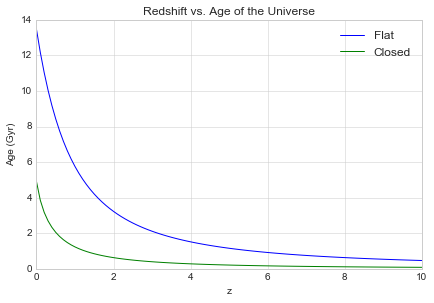

In [51]:
fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Redshift vs. Age of the Universe")
ax.set_xlabel("z")
ax.set_ylabel("Age (Gyr)")

ax.plot(z_points, flat, label="Flat")
ax.plot(z_points, closed, label="Closed")
ax.legend()

### 3. Use the program to find the value of $\Omega_{r}$ for a radiation only open universe (no cosmological constant) that would give the same age of the universe (for the current day) as our benchmark flat universe with $\Omega_{m,0}$ = 0.3, $\Omega_{\Lambda,0}$=0.7 ###

In [42]:
#age of our universe is flat_age

r = np.linspace(0, 1, 1000000);

for val in r:
    H_radiation = lambda z: 1/(H(z, val, 0, 0)*(1+z));
    rad_age = quad(H_radiation, 0, 10000)[0];
    if (abs(flat_age - rad_age) <= 10e-4):
        break 
print("The value for density in a radiation only open universe is:")
print(val)

The value for density in a radiation only open universe is:
0.001384001384
